<a href="https://colab.research.google.com/github/Shaheer04/Decision_trees/blob/main/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer


In [3]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset
dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
dataset.shape

(569, 30)

In [6]:
from sklearn.model_selection import train_test_split
X = dataset.copy()
Y = data['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(X_train, Y_train)

list of stopping criterias for decision tree to stop it from growing all the way to maximum possible length

max_depth    

min_sample_split

min_sample_leaf

min_weight_fraction_leaf

max_leaf_nodes

min_impurity_decrease

min_impurity_split

 Decision Tree Approaches

criterion

splitter

max_features

random_state

In [8]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1])

In [10]:
# another of prediciting in Decision trees
# this show the diff between the trees that doesn't have stopping criteria and the one that does
clf.predict_proba(X_test)

array([[0.00383142, 0.99616858],
       [0.00383142, 0.99616858],
       [0.99342105, 0.00657895],
       [0.00383142, 0.99616858],
       [0.00383142, 0.99616858],
       [0.99342105, 0.00657895],
       [0.00383142, 0.99616858],
       [0.00383142, 0.99616858],
       [0.99342105, 0.00657895],
       [0.00383142, 0.99616858],
       [1.        , 0.        ],
       [0.99342105, 0.00657895],
       [0.99342105, 0.00657895],
       [0.99342105, 0.00657895],
       [0.00383142, 0.99616858],
       [0.00383142, 0.99616858],
       [0.99342105, 0.00657895],
       [0.99342105, 0.00657895],
       [0.00383142, 0.99616858],
       [0.99342105, 0.00657895],
       [0.00383142, 0.99616858],
       [0.99342105, 0.00657895],
       [0.00383142, 0.99616858],
       [0.99342105, 0.00657895],
       [0.00383142, 0.99616858],
       [0.00383142, 0.99616858],
       [0.5       , 0.5       ],
       [0.99342105, 0.00657895],
       [0.00383142, 0.99616858],
       [0.00383142, 0.99616858],
       [0.

Performance Metrics of the model

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.8771929824561403

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions, labels=[0,1])

array([[37,  4],
       [11, 62]])

In [13]:
from sklearn.metrics import precision_score
precision_score(Y_test, predictions)

0.9393939393939394

In [14]:
from sklearn.metrics import recall_score
recall_score(Y_test, predictions)

0.8493150684931506

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.77      0.90      0.83        41
      benign       0.94      0.85      0.89        73

    accuracy                           0.87       114
   macro avg       0.86      0.88      0.86       114
weighted avg       0.88      0.87      0.87       114



In [16]:
feature_names = X.columns

In [17]:
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [18]:
clf.feature_importances_

array([0.01668759, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.76210062, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01913765, 0.        ,
       0.        , 0.        , 0.01613594, 0.        , 0.        ,
       0.00627929, 0.01827985, 0.        , 0.08487136, 0.        ,
       0.        , 0.0765077 , 0.        , 0.        , 0.        ])

In [21]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)
feature_importance

,0
mean concave points,0.762101
worst area,0.084871
worst concavity,0.076508
area error,0.019138
worst texture,0.018280
mean radius,0.016688
concave points error,0.016136
worst radius,0.006279
concavity error,0.000000
worst symmetry,0.000000


<Axes: >

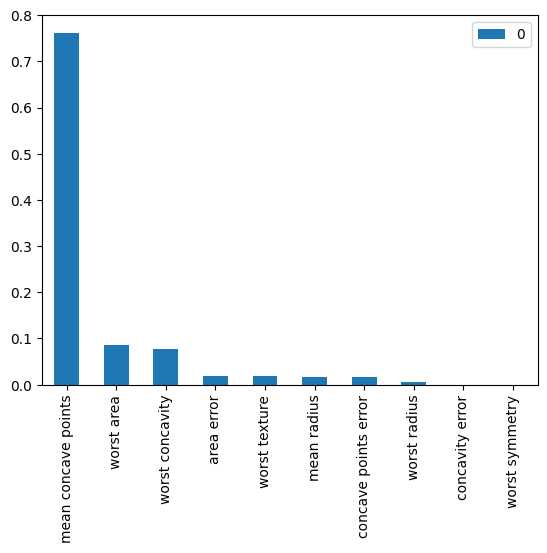

In [22]:
feature_importance.head(10).plot(kind='bar')

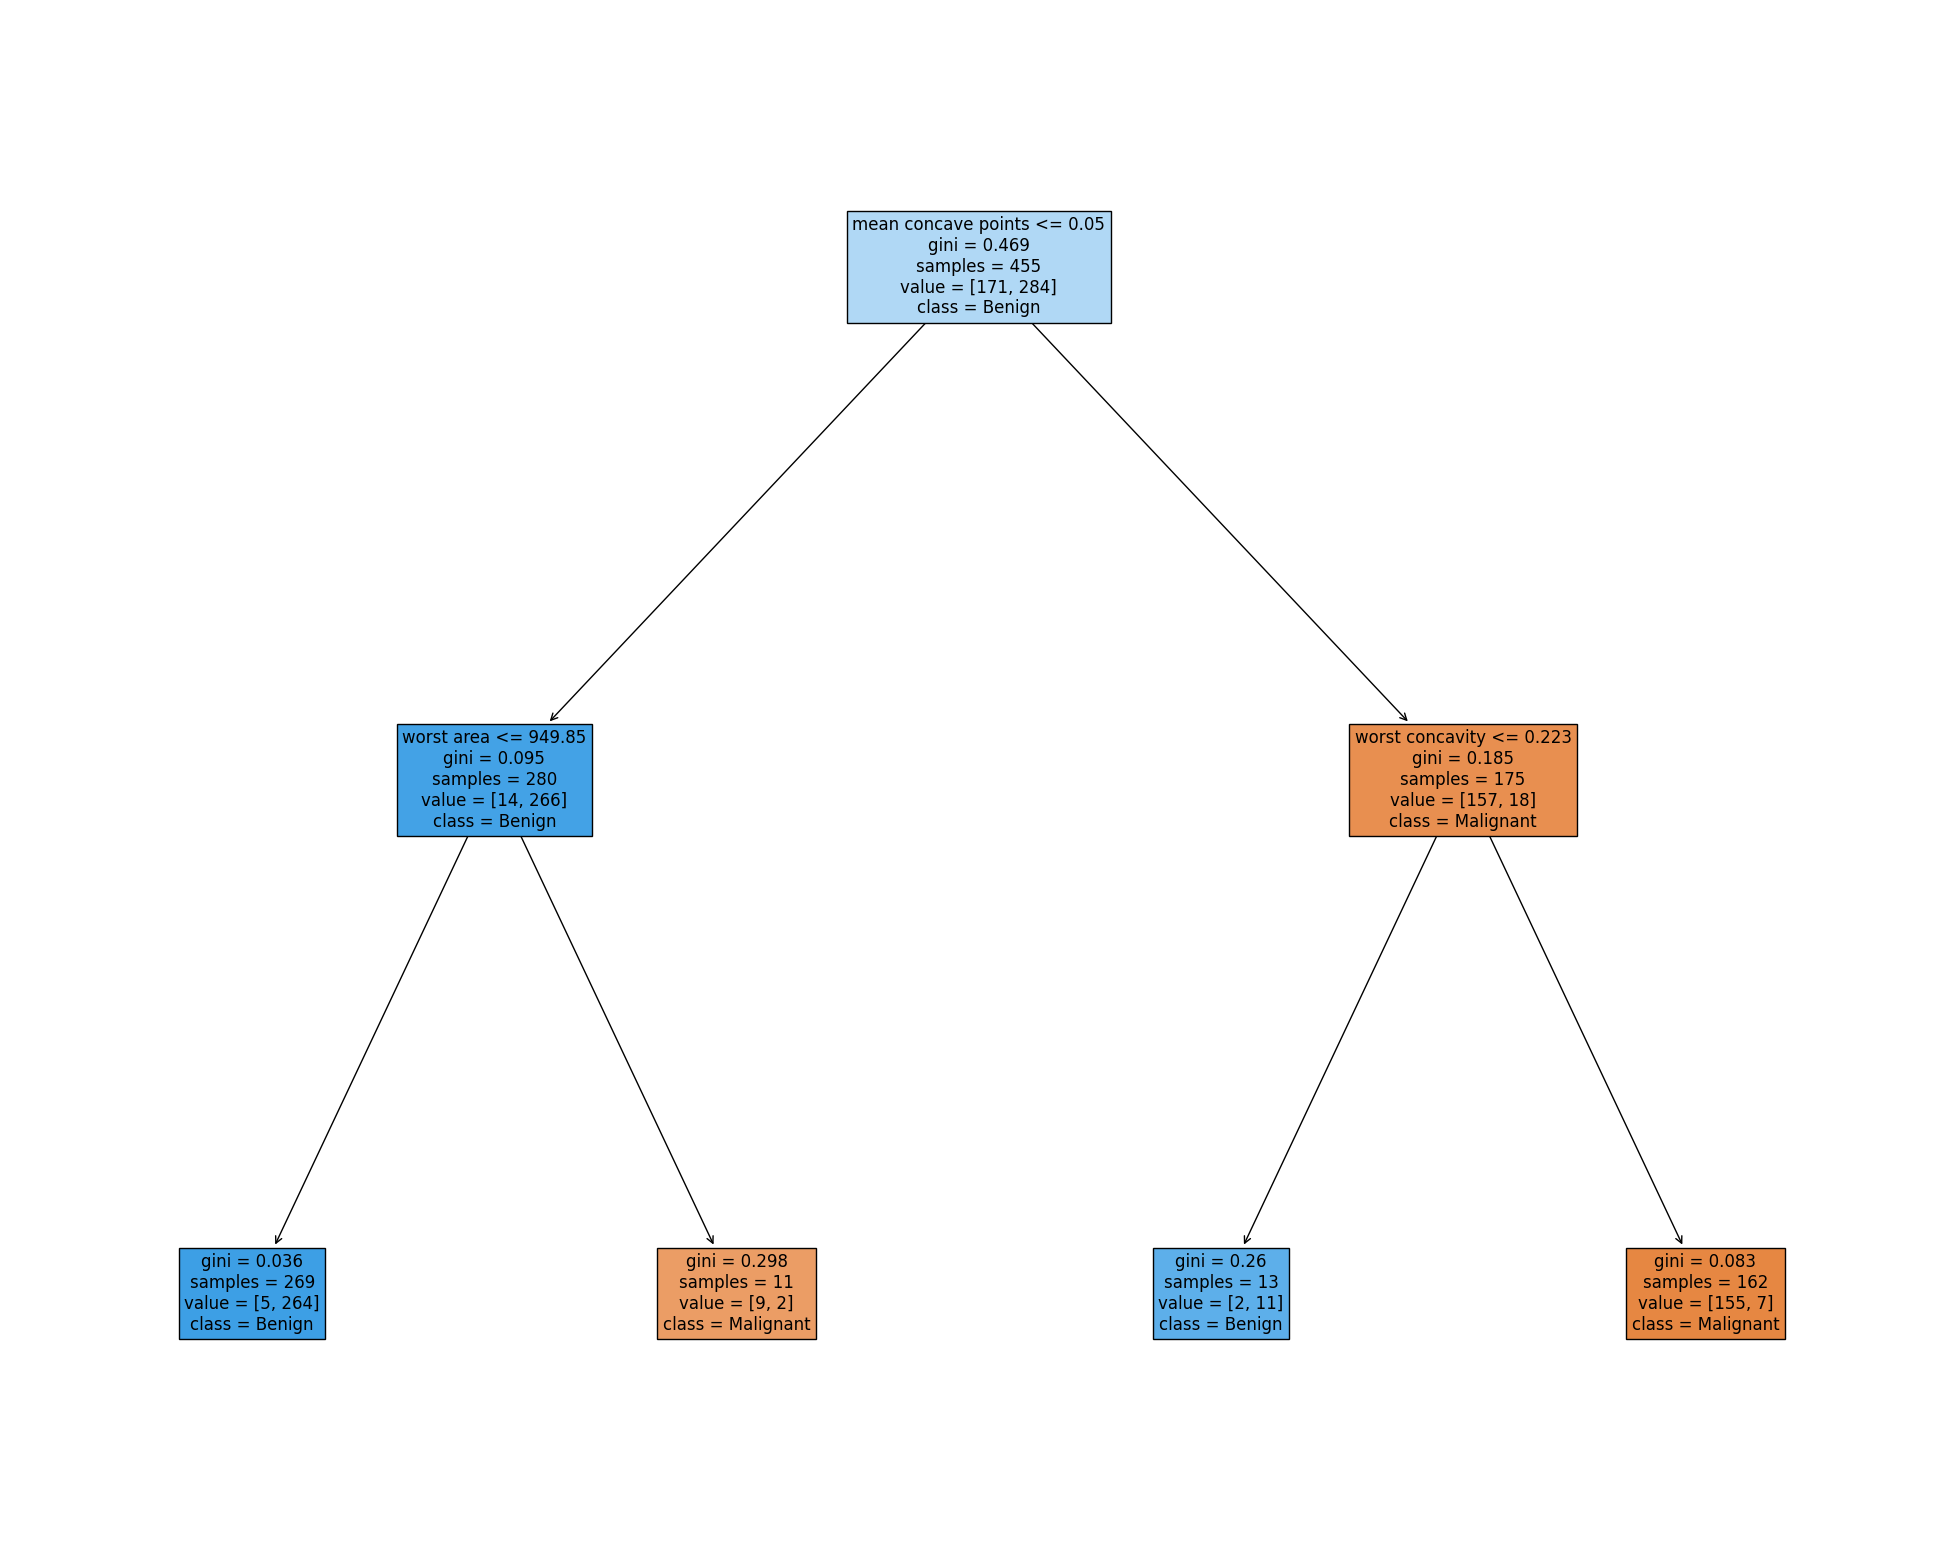

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                   fontsize=12)